<a href="https://colab.research.google.com/github/haisukma/Flight-Price-Prediction/blob/main/Flight_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

In [6]:
airplane = pd.read_csv('//content/Clean_Dataset.csv')
airplane.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
airplane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [8]:
airplane.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [9]:
airplane.duplicated().sum()

0

Hapus kolom unnamed dan flight karena tidak dibutuhkan untuk tahap analisis

In [10]:
df = airplane.drop(columns=['Unnamed: 0', 'flight'])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df.isnull().sum()

,0
airline,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0
price,0


In [13]:
df.dtypes

,0
airline,object
source_city,object
departure_time,object
stops,object
arrival_time,object
destination_city,object
class,object
duration,float64
days_left,int64
price,int64


**Summary:**
*   Dataset ini berisi 300.153records dan 10 kolom
*   Tidak ada nilai yang hilang di kolom manapun
*   Semua tipe data sudah sesuai dan konsisten



In [51]:
def split_input_output(data, target_column):
    """
    Splits the input data into features and target output.

    Parameters
    ----------
    data : pandas DataFrame
        The input DataFrame containing the features and the target variable.

    target_column : str
        The name of the column to be used as the target variable.

    Returns
    -------
    X : pandas DataFrame
        DataFrame containing the features (all columns except the target).

    y : pandas Series
        Series containing the target variable.
    """
    # split the data into features and target variable
    X = data.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [52]:
X, y = split_input_output(data = df,
                          target_column = 'price')

In [53]:
X.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1


In [54]:
y.head(
)

,price
0,5953
1,5953
2,5956
3,5955
4,5955


In [55]:
from sklearn.model_selection import train_test_split

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 123)

In [56]:
# getting the number of samples and features from the training set
n_samples, n_features = X_train.shape

print(f'Number of samples: {n_samples}')
print(f'Number of features: {n_features}')

Number of samples: 240122
Number of features: 9


Dataset dibagi menjadi feature X dan target variable y, dengan Price sebagai target. Dataset ini dibagi menjadi set training dan testing dengan rasio 80:20, menghasilkan 240.122 sampel untuk set training dan 60.030 sampel untuk set testing

Exploratory Data Analysis

In [57]:
# concatenating the training and test set for eda
df_eda = pd.concat([X_train, y_train], axis=1)
df_eda.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
115285,GO_FIRST,Bangalore,Night,one,Morning,Hyderabad,Economy,12.83,47,6075
4664,Vistara,Delhi,Afternoon,zero,Afternoon,Mumbai,Economy,2.17,25,2700
179922,Indigo,Hyderabad,Afternoon,one,Night,Chennai,Economy,7.25,43,1543
74271,Vistara,Mumbai,Evening,one,Evening,Hyderabad,Economy,21.25,29,4414
183212,Vistara,Chennai,Night,one,Morning,Delhi,Economy,11.58,22,4971


In [58]:
num_column = df_eda.select_dtypes(include='number').columns
cat_column = df_eda.select_dtypes(include='object').columns

print(f'List numerical columns: \n{num_column}')
print(f'\nList categorical columns: \n{cat_column}')

List numerical columns: 
Index(['duration', 'days_left', 'price'], dtype='object')

List categorical columns: 
Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class'],
      dtype='object')


Check Unique Values

In [61]:
# iterating through categorical column to check unique values
for i in cat_column:
    print(f'Unique value in {i} column:')
    print(df_eda[i].unique())
    print('-'*100)

Unique value in airline column:
['GO_FIRST' 'Vistara' 'Indigo' 'Air_India' 'AirAsia' 'SpiceJet']
----------------------------------------------------------------------------------------------------
Unique value in source_city column:
['Bangalore' 'Delhi' 'Hyderabad' 'Mumbai' 'Chennai' 'Kolkata']
----------------------------------------------------------------------------------------------------
Unique value in departure_time column:
['Night' 'Afternoon' 'Evening' 'Early_Morning' 'Morning' 'Late_Night']
----------------------------------------------------------------------------------------------------
Unique value in stops column:
['one' 'zero' 'two_or_more']
----------------------------------------------------------------------------------------------------
Unique value in arrival_time column:
['Morning' 'Afternoon' 'Night' 'Evening' 'Early_Morning' 'Late_Night']
----------------------------------------------------------------------------------------------------
Unique value in destin

**Univariate Analysis**

<ipython-input-63-240fb5ebbd1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df_eda[num_column[i]], ax=ax[i], palette='muted')
<ipython-input-63-240fb5ebbd1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df_eda[num_column[i]], ax=ax[i], palette='muted')
<ipython-input-63-240fb5ebbd1d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = df_eda[num_column[i]], ax=ax[i], palette='muted')


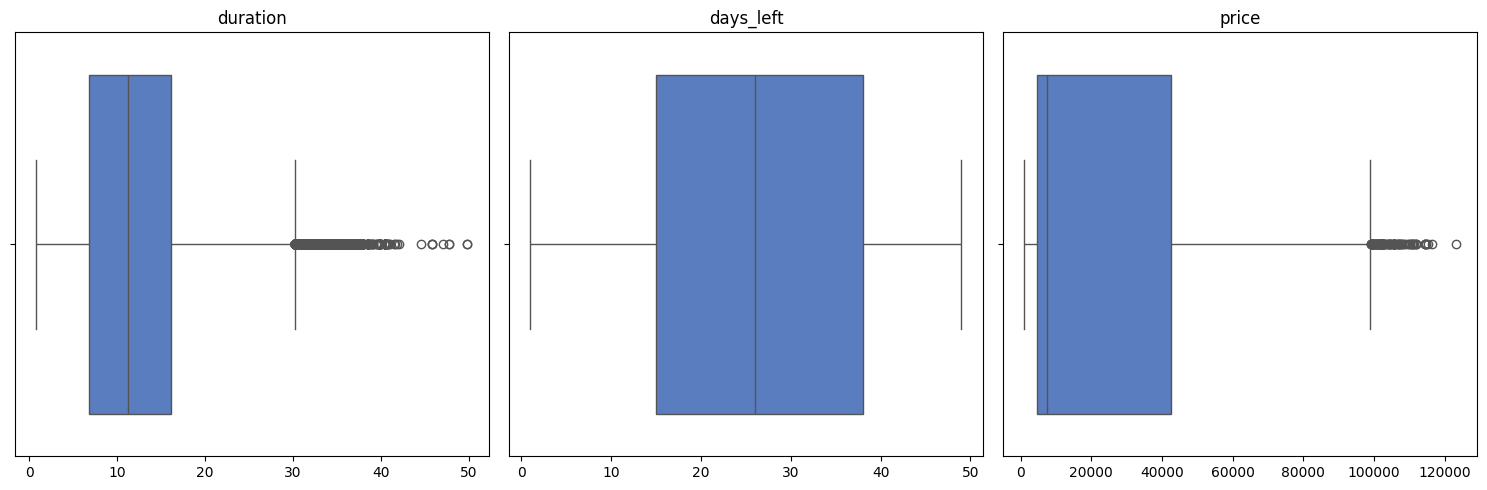

In [63]:
# creating subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# looping through numerical column to create box plot
for i in range(0, len(num_column)):
    sns.boxplot(x = df_eda[num_column[i]], ax=ax[i], palette='muted')
    ax[i].set_title(num_column[i])
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

Terdapat outlier pada kolom duration, yang mengharuskan untuk dilakukan handling outlier pada tahap preprocessing. Penanganan outlier sangat krusial karena dapat secara signifikan mengubah hasil analisis data dan berdampak buruk pada kinerja model

<ipython-input-71-1ecc6a65a1f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[list_col[i]],
<ipython-input-71-1ecc6a65a1f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[list_col[i]],
<ipython-input-71-1ecc6a65a1f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df[list_col[i]],
<ipython-input-71-1ecc6a65a1f3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countpl

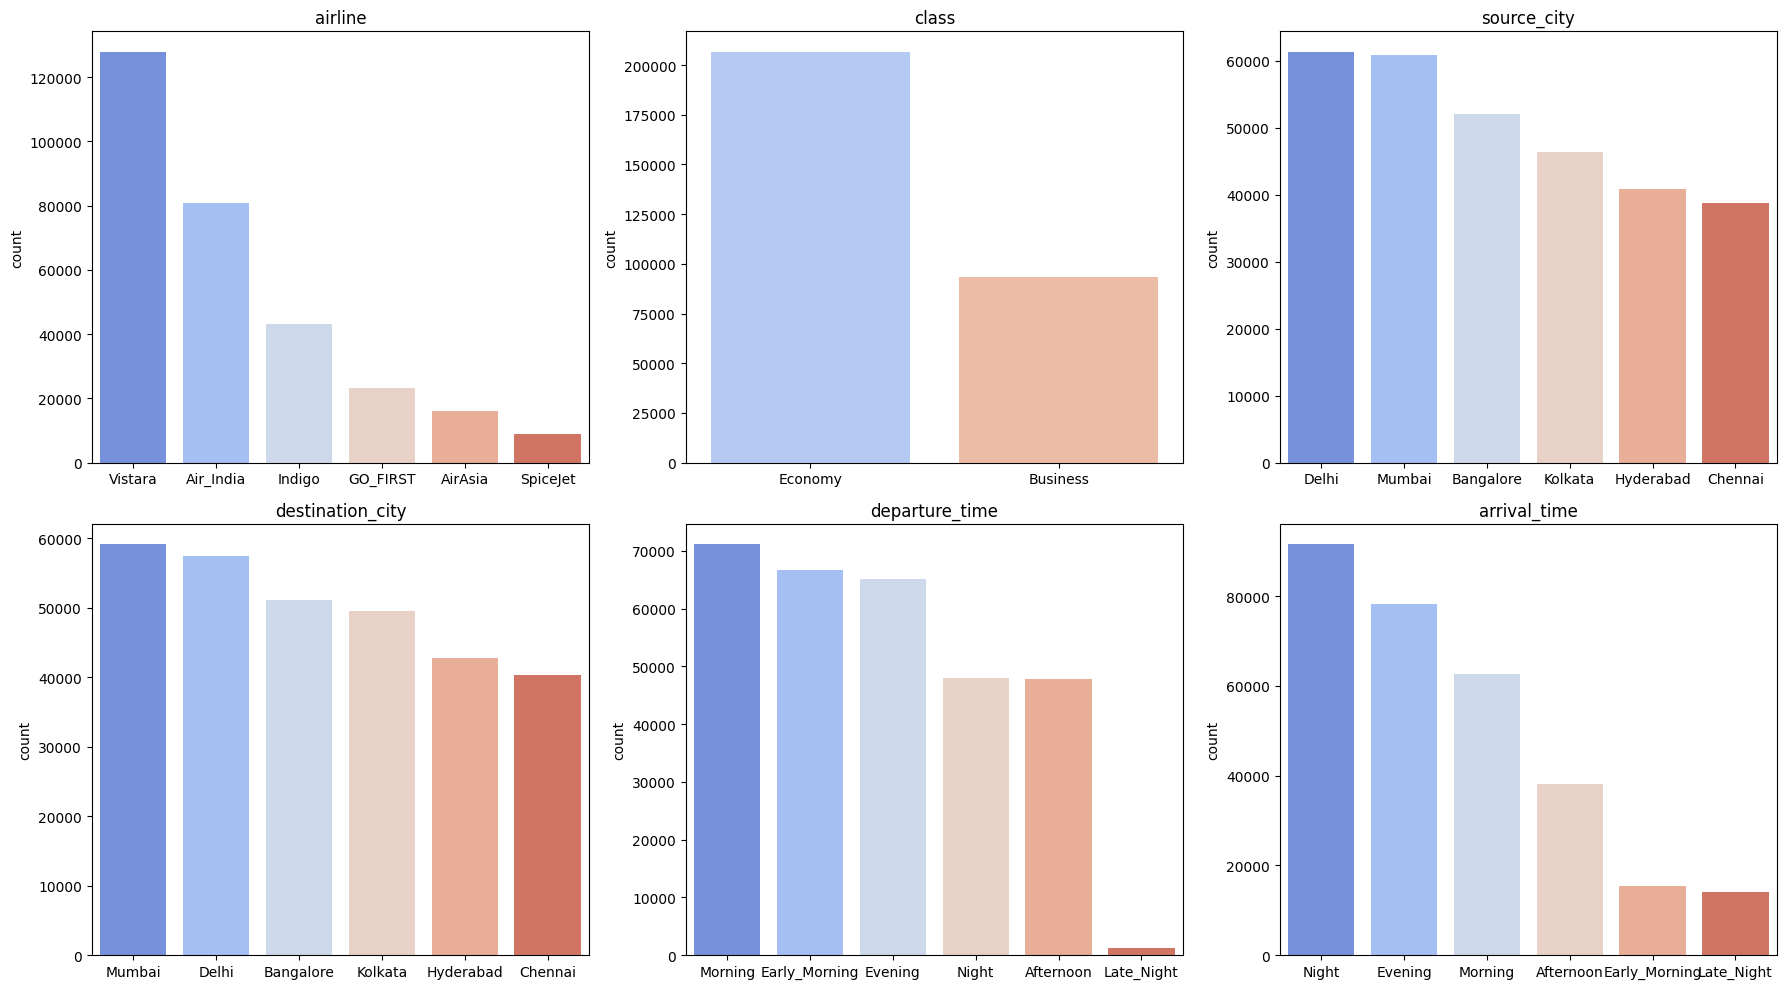

In [71]:
# list of categorical columns to be visualized
list_col = ['airline', 'class', 'source_city',
            'destination_city', 'departure_time', 'arrival_time']
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
ax = ax.flatten()

# looping through categorical column to create count plot
for i in range(len(list_col)):
    # get the order of categories based on frequency
    order = df_eda[list_col[i]].value_counts().index

    sns.countplot(x = df[list_col[i]],
                  ax=ax[i],
                  order=order,
                  palette = 'coolwarm')
    ax[i].set_title(list_col[i])
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

* Airline: Vistara merupakan maskapai yang paling populer di kalangan penumpang, sementara SpiceJet memiliki jumlah penumpang terendah. Hal ini menunjukkan bahwa Vistara mungkin memiliki pangsa pasar yang lebih besar dibandingkan dengan maskapai lainnya

* Class: Kelas ekonomi merupakan pilihan yang paling disukai oleh para pelancong, secara signifikan melampaui popularitas kelas bisnis

* Source City: Delhi menjadi kota asal dengan jumlah penerbangan tertinggi, diikuti oleh Mumbai dan Bangalore. Tren ini dapat dikaitkan dengan kota metropolitan besar seperti Delhi yang memiliki bandara yang lebih besar dan volume penerbangan yang lebih besar

* Destination City: Mumbai adalah kota tujuan paling populer untuk penerbangan, diikuti oleh Delhi dan Bangalore di belakangnya

* Departure Time: Pagi dan Dini Hari adalah waktu keberangkatan puncak, menunjukkan preferensi di antara penumpang untuk memulai perjalanan mereka di pagi hari

* Arrival Time: Sebaliknya, Malam dan Sore hari adalah waktu kedatangan yang paling umum, menunjukkan bahwa penumpang lebih menyukai perjalanan di malam hari untuk mencapai tujuan mereka

**Bivariate Analysis**

<ipython-input-72-529f85407bd1>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_airline,
<ipython-input-72-529f85407bd1>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df,


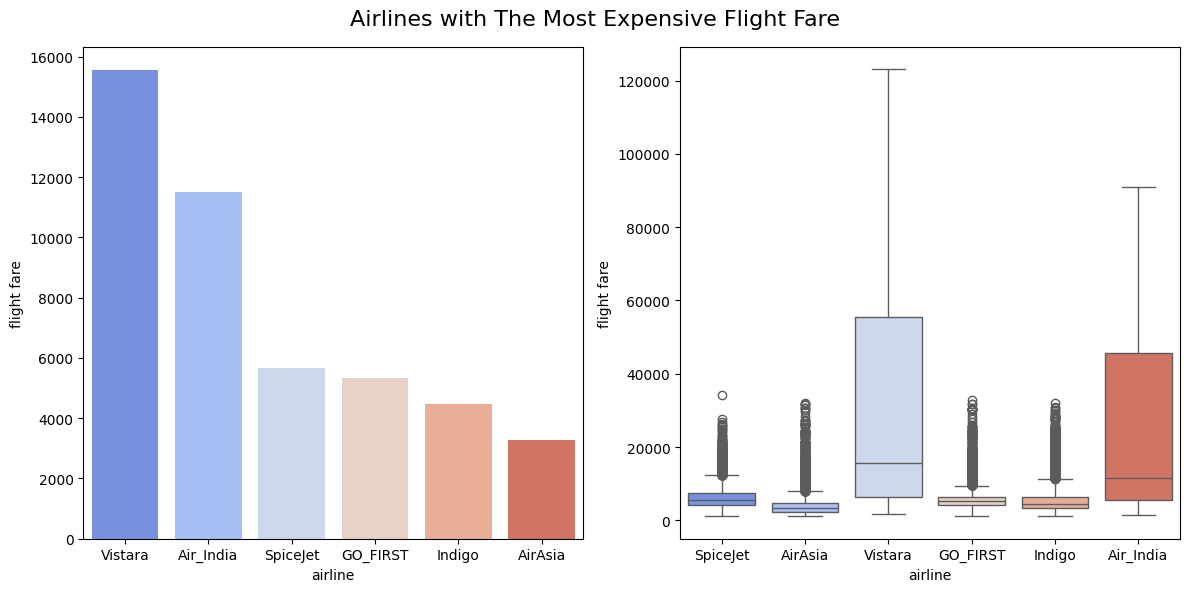

In [72]:
# calculate and sort the airlines based on median price
median_price_airline = df.groupby('airline')['price'].median().reset_index()
sorted_airline = median_price_airline.sort_values(by='price', ascending=False)

# create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plt.suptitle('Airlines with The Most Expensive Flight Fare',fontsize=16)

# bar plot for median flight prices by airline
sns.barplot(data=sorted_airline,
            x='airline',
            y='price',
            palette = 'coolwarm',
            ax = ax[0])
ax[0].set_xlabel('airline')
ax[0].set_ylabel('flight fare')

# box plot for median flight prices by airline
sns.boxplot(data=df,
            x='airline',
            y='price',
            palette = 'coolwarm',
            ax = ax[1])
ax[1].set_xlabel('airline')
ax[1].set_ylabel('flight fare')

plt.tight_layout()
plt.show()

<ipython-input-73-2d6e01cfe969>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sorted_business_price,
<ipython-input-73-2d6e01cfe969>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = sorted_economy_price,


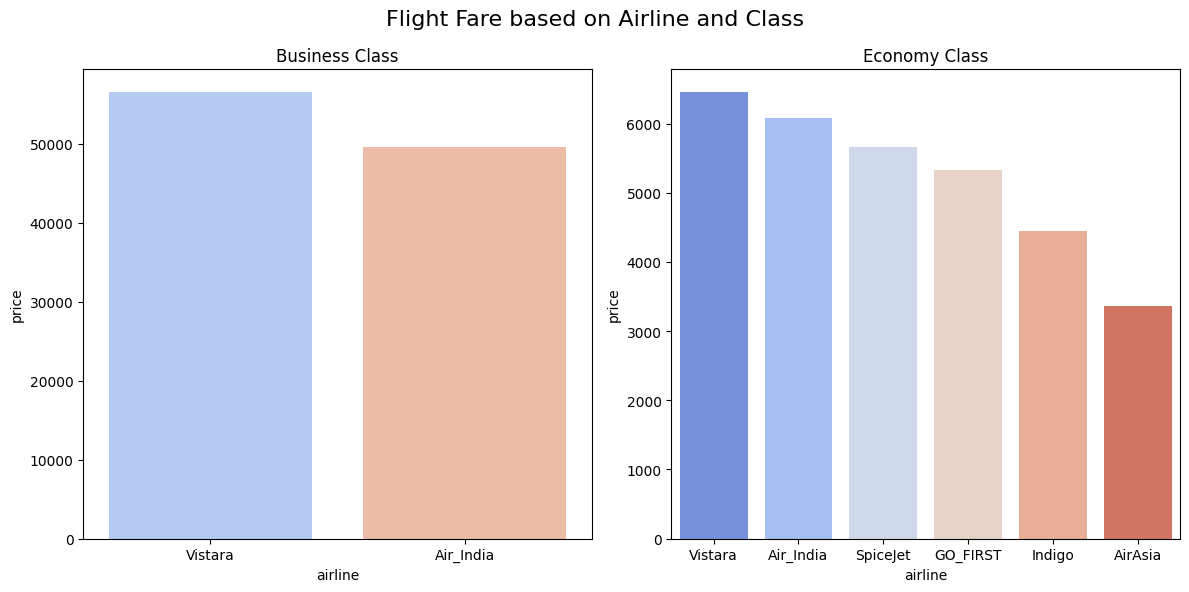

In [73]:
# calculate and sort business class airlines based on median price
airline_business = df_eda[df_eda['class'] == 'Business']
business_price = airline_business.groupby('airline')['price'].median().reset_index()
sorted_business_price = business_price.sort_values(by = 'price', ascending=False)

# calculate and sort economy class airlines based on median price
airline_economy = df_eda[df_eda['class'] == 'Economy']
economy_price = airline_economy.groupby('airline')['price'].median().reset_index()
sorted_economy_price = economy_price.sort_values(by = 'price', ascending=False)

# create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
plt.suptitle('Flight Fare based on Airline and Class', fontsize=16)

# bar plot for median flight prices for business Class
sns.barplot(data = sorted_business_price,
            x='airline',
            y='price',
            palette = 'coolwarm',
            ax = ax[0])
ax[0].set_title('Business Class')
ax[0].set_xlabel('airline')
ax[0].set_ylabel('price')

# bar plot for median flight prices for economy Class
sns.barplot(data = sorted_economy_price,
            x='airline',
            y='price',
            palette = 'coolwarm',
            ax = ax[1])
ax[1].set_title('Economy Class')
ax[1].set_xlabel('airline')
ax[1].set_ylabel('price')

plt.tight_layout()
plt.show()

<ipython-input-74-3c1d19e0e7e2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_categories,
<ipython-input-74-3c1d19e0e7e2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_categories,
<ipython-input-74-3c1d19e0e7e2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sorted_categories,
<ipython-input-74-3c1d19e0e7e2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barp

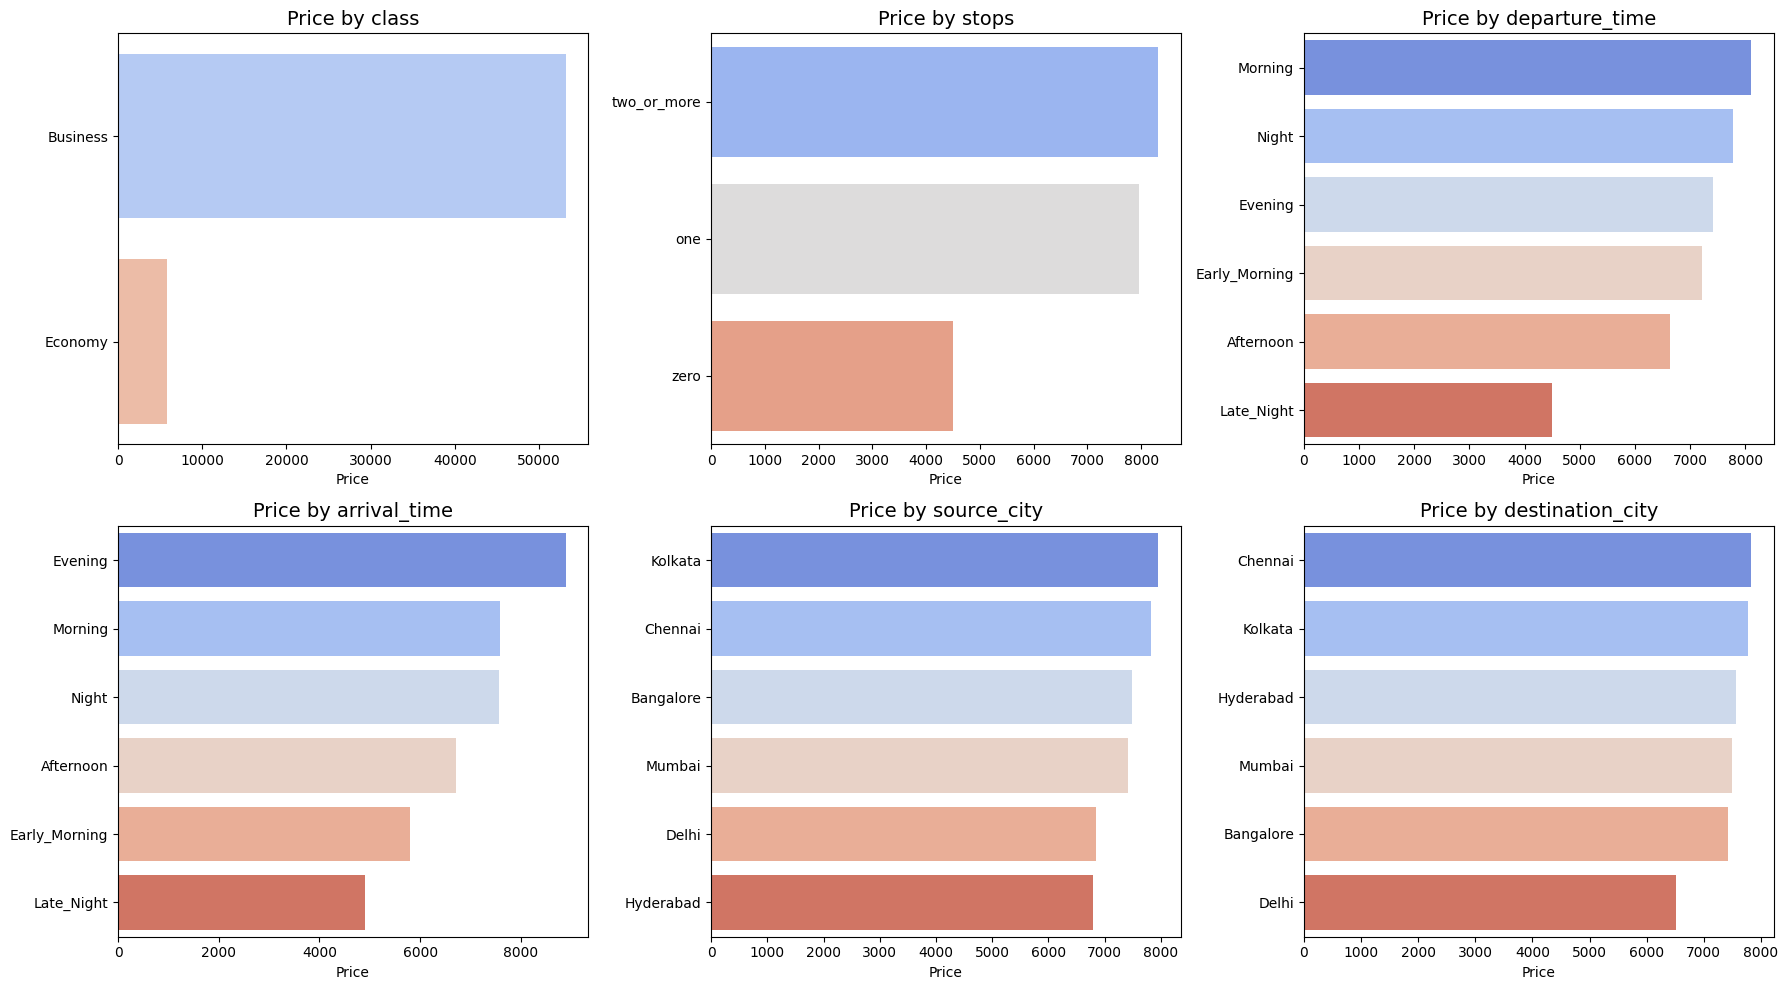

In [74]:
# define the list of categorical columns
barchart_list = ['class', 'stops', 'departure_time',
                'arrival_time', 'source_city', 'destination_city']

# create subplots
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,10))
ax = ax.flatten()

# loop through each category in the barchart_list
for i, bar in enumerate(barchart_list):
    flight_fare = df_eda.groupby(bar)['price'].median().reset_index()
    sorted_categories = flight_fare.sort_values(by = 'price', ascending=False)

    # create a bar plot for each category
    sns.barplot(data=sorted_categories,
                y = bar,
                x ='price',
                palette = 'coolwarm',
                ax = ax[i])

    # set the title and labels for each subplot
    ax[i].set_title(f'Price by {bar}', fontsize=14)
    ax[i].set_xlabel('Price')
    ax[i].set_ylabel('')

plt.tight_layout()
plt.show()

* Price by Class: Harga tiket kelas bisnis secara signifikan lebih tinggi dibandingkan kelas ekonomi. Harga tiket kelas ekonomi lebih terjangkau, sehingga menjadi pilihan yang populer bagi sebagian besar penumpang

* Price by Total Stops: Penerbangan dengan jumlah stop >= 2 cenderung lebih mahal dibandingkan penerbangan non-stop. Temuan ini cukup menarik karena biasanya penerbangan nonstop akan cenderung lebih pricey. Hal ini mungkin dapat disebabkan karena mayoritas penerbangan nonstop adalah penerbangan jarak dekat yang memiliki harga tiket lebih rendah

* Price by Source City: Kalkota, Chennai dan Bangalore menjadi kota keberangkatan dengan harga tiket pesawat paling tinggi

* Price by Destination City: Chennai, Kalkota dan Hyederabad menjadi kota tujuan dengan harga paling tinggi

* Price by Departure and Arrival Time: Harga tiket pesawat untuk penerbangan atau kedatangan tengah malam cenderung lebih murah dibandingkan waktu lainnya

**Prepocessing**

In [75]:
# concatenate X_train and y_train for preprocessing
train_set = pd.concat([X_train, y_train], axis=1)

Handling Outliers

Sebelumnya, telah diidentifikasi bahwa ada potensi outlier dalam variable duration. Oleh karena itu, sangat penting untuk memeriksa apakah data penumpang yang terkait dengan durasi penerbangan yang sangat panjang masuk akal atau tidak

In [76]:
# filter data for outlier checking
train_set[train_set['duration'] > 24]

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
273411,Vistara,Kolkata,Evening,one,Evening,Chennai,Business,26.33,20,55502
143975,Air_India,Kolkata,Early_Morning,two_or_more,Evening,Hyderabad,Economy,34.58,15,11293
286265,Air_India,Hyderabad,Morning,one,Afternoon,Chennai,Business,25.33,22,51595
258670,Vistara,Bangalore,Evening,one,Evening,Hyderabad,Business,26.00,44,56588
235364,Air_India,Mumbai,Evening,one,Evening,Kolkata,Business,24.17,17,49725
...,...,...,...,...,...,...,...,...,...,...
71200,Air_India,Mumbai,Evening,one,Night,Hyderabad,Economy,26.00,8,11088
153313,SpiceJet,Hyderabad,Evening,one,Evening,Delhi,Economy,26.83,10,6238
220374,Air_India,Delhi,Evening,one,Night,Hyderabad,Business,27.75,24,39321
129130,SpiceJet,Kolkata,Night,one,Night,Mumbai,Economy,24.17,13,7958


Mengingat semua data berkaitan dengan penerbangan domestik, tampaknya tidak masuk akal bagi penumpang untuk menghabiskan lebih dari satu hari bepergian untuk penerbangan loksl. Karena perjalanan domestik biasanya hanya memakan waktu beberapa jam, durasi yang melebihi 24 jam menunjukkan adanya outlier dalam dataset

In [77]:
def remove_outlier(data, columns):
    """
    Removes outliers from specified columns in the given DataFrame using the Interquartile Range (IQR) method.

    Parameters
    ----------
    data : pandas DataFrame
        The input DataFrame from which outliers will be removed.

    columns : list of str
        List of column names in which to identify and remove outliers.

    Returns
    -------
    clean_data : pandas DataFrame
        A new DataFrame containing the original data with outliers removed from the specified columns.
        Any rows that contained outliers in the specified columns are also dropped from the DataFrame.
    """
    # create a copy of the original data
    clean_data = data.copy()

    # iterate through the specified columns to remove outliers
    for col in columns:
        Q1 = np.quantile(data[col], 0.25)
        Q3 = np.quantile(data[col], 0.75)
        IQR = Q3 - Q1
        upper_thres = 1.5 * IQR
        lower_thres = -1.5 * IQR

        clean_data[col] = clean_data[col][(clean_data[col] >= lower_thres)
                                          & (clean_data[col] <= upper_thres)]

    # drop any rows with NaN values
    clean_data = clean_data.dropna()

    return clean_data

In [78]:
# Remove outliers from the duration column
train_set_clean = remove_outlier(data = train_set, columns = ['duration'])

<ipython-input-79-bde902926b14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = train_set_clean[num_column[i]], ax=ax[i], palette='muted')
<ipython-input-79-bde902926b14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = train_set_clean[num_column[i]], ax=ax[i], palette='muted')
<ipython-input-79-bde902926b14>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = train_set_clean[num_column[i]], ax=ax[i], palette='muted')


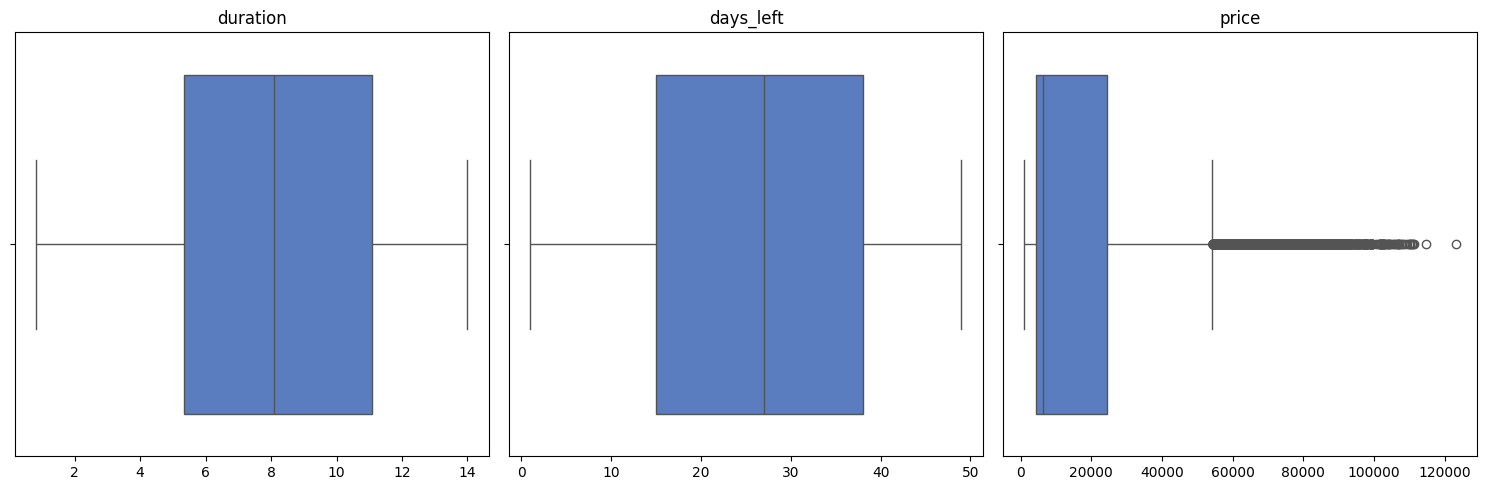

In [79]:
# creating subplots
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# looping through numerical column to create box plot
for i in range(0, len(num_column)):
    sns.boxplot(x = train_set_clean[num_column[i]], ax=ax[i], palette='muted')
    ax[i].set_title(num_column[i])
    ax[i].set_xlabel('')

plt.tight_layout()
plt.show()

In [80]:
print(f'Shape data sebelum drop outlier: {train_set.shape}')
print(f'Shape data sebelum drop outlier: {train_set_clean.shape}')

percent_outlier = (1 - (len(train_set_clean) / len(train_set))) * 100
print(f'Persentase data yang dihapus: {round(percent_outlier, 2)}%')

Shape data sebelum drop outlier: (240122, 10)
Shape data sebelum drop outlier: (157015, 10)
Persentase data yang dihapus: 34.61%


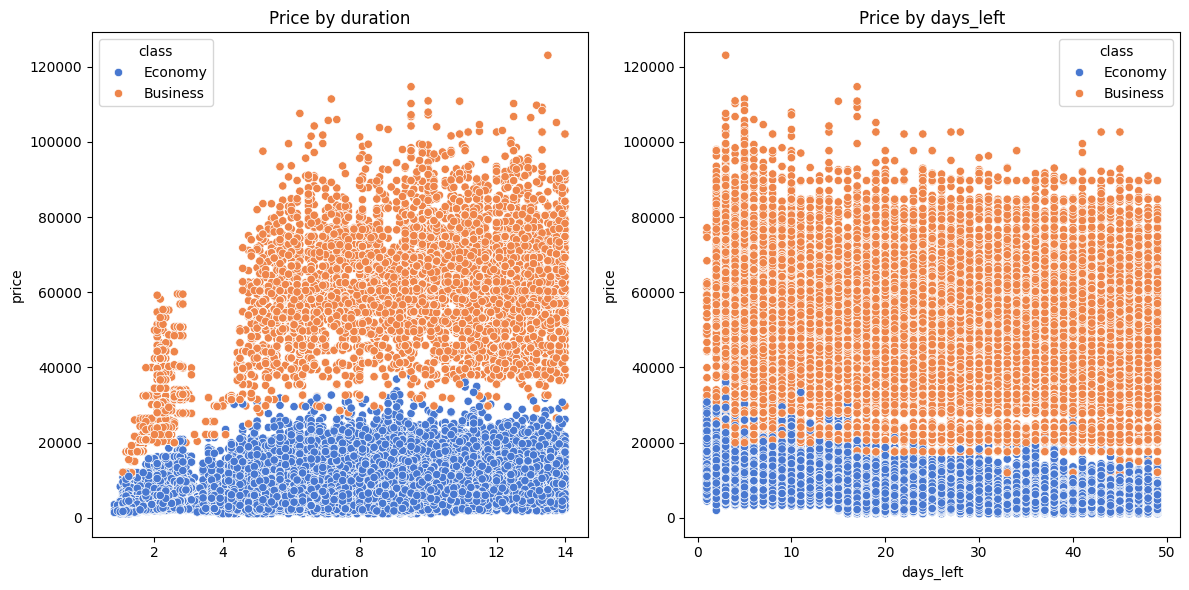

In [81]:
# create subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
cols = ['duration', 'days_left']

# loop through the specified columns and create scatter plots
for i in range(len(cols)):
    sns.scatterplot(data = train_set_clean,
                    x = cols[i],
                    y = 'price',
                    hue = 'class',
                    ax = ax[i],
                    palette = 'muted')
    ax[i].set_title(f'Price by {cols[i]}')
    ax[i].set_xlabel(cols[i])

plt.tight_layout()
plt.show()

Setelah melakukan penanganan outlier pada variabel duration, pola distribusi harga tiket berdasarkan durasi perjalanan menjadi semakin jelas. Terlihat bahwa penerbangan dengan durasi yang lebih pendek cenderung memiliki harga tiket yang lebih rendah

**Categorical Encoding**

In [82]:
from sklearn.preprocessing import OneHotEncoder

def categorical_encoding(data, fit=True, encoder=None):
    """
    Performs one-hot encoding on categorical features in the given DataFrame.

    Parameters
    ----------
    data : pandas DataFrame
        The input DataFrame containing the data to be encoded, including a target column 'price'.

    fit : bool, optional, default=True
        Indicates whether to fit a new encoder.

    encoder : OneHotEncoder, optional, default=None
        An existing OneHotEncoder object to use for transforming the data.
    Returns
    -------
    encoder : OneHotEncoder
        The fitted OneHotEncoder object, which can be reused for transforming new data.

    final_df : pandas DataFrame
        A new DataFrame containing the original data with categorical features one-hot encoded
        and the target column 'price' retained.
    """
    # create a copy of the original data and reset the index
    data_copy = data.copy().reset_index(drop=True)
    target_col = data_copy['price']
    data_copy = data_copy.drop('price', axis=1)

    # select categorical features
    categorical_features = data_copy.select_dtypes(include='object').columns

    if fit:
        # initialize OneHotEncoder
        ohe = OneHotEncoder(handle_unknown='ignore', drop='first')

        # fit and transform the categorical features
        ohe.fit(data_copy[categorical_features])
        encoder = ohe
        encoded_df = pd.DataFrame(ohe.transform(data_copy[categorical_features]).toarray())
    else:
        # use existing encoder object to transform
        encoded_df = pd.DataFrame(encoder.transform(data_copy[categorical_features]).toarray())

    # rename columns
    encoded_df.columns = encoder.get_feature_names_out(categorical_features)

    # drop original cat feature
    dropped_data = data_copy.drop(categorical_features, axis=1)

    # merge one-hot encoded columns back with original DataFrame
    final_df = dropped_data.join([encoded_df, target_col])

    return encoder, final_df

In [83]:
encoder, train_set_clean = categorical_encoding(data = train_set_clean,
                                                fit = True)

train_set_clean.head()

,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy,price
0,12.83,47,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,6075
1,2.17,25,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2700
2,7.25,43,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1543
3,11.58,22,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4971
4,9.50,12,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,9879


In [84]:
train_set_clean.columns

Index(['duration', 'days_left', 'airline_Air_India', 'airline_GO_FIRST',
       'airline_Indigo', 'airline_SpiceJet', 'airline_Vistara',
       'source_city_Chennai', 'source_city_Delhi', 'source_city_Hyderabad',
       'source_city_Kolkata', 'source_city_Mumbai',
       'departure_time_Early_Morning', 'departure_time_Evening',
       'departure_time_Late_Night', 'departure_time_Morning',
       'departure_time_Night', 'stops_two_or_more', 'stops_zero',
       'arrival_time_Early_Morning', 'arrival_time_Evening',
       'arrival_time_Late_Night', 'arrival_time_Morning', 'arrival_time_Night',
       'destination_city_Chennai', 'destination_city_Delhi',
       'destination_city_Hyderabad', 'destination_city_Kolkata',
       'destination_city_Mumbai', 'class_Economy', 'price'],
      dtype='object')

In [85]:
def plot_corr_heatmap(data):
    """
    Plots a correlation heatmap for the given DataFrame.

    Parameters
    ----------
    data : pandas DataFrame
        The input DataFrame containing numerical features for which the correlation matrix
        will be computed.

    Returns
    -------
    None
        The function directly displays the heatmap plot and does not return any values.
    """
    # define the figure
    plt.figure(figsize=(12, 12))

    # plot correlation heatmap
    sns.heatmap(data.corr(),
                cmap='Blues',
                annot = False)

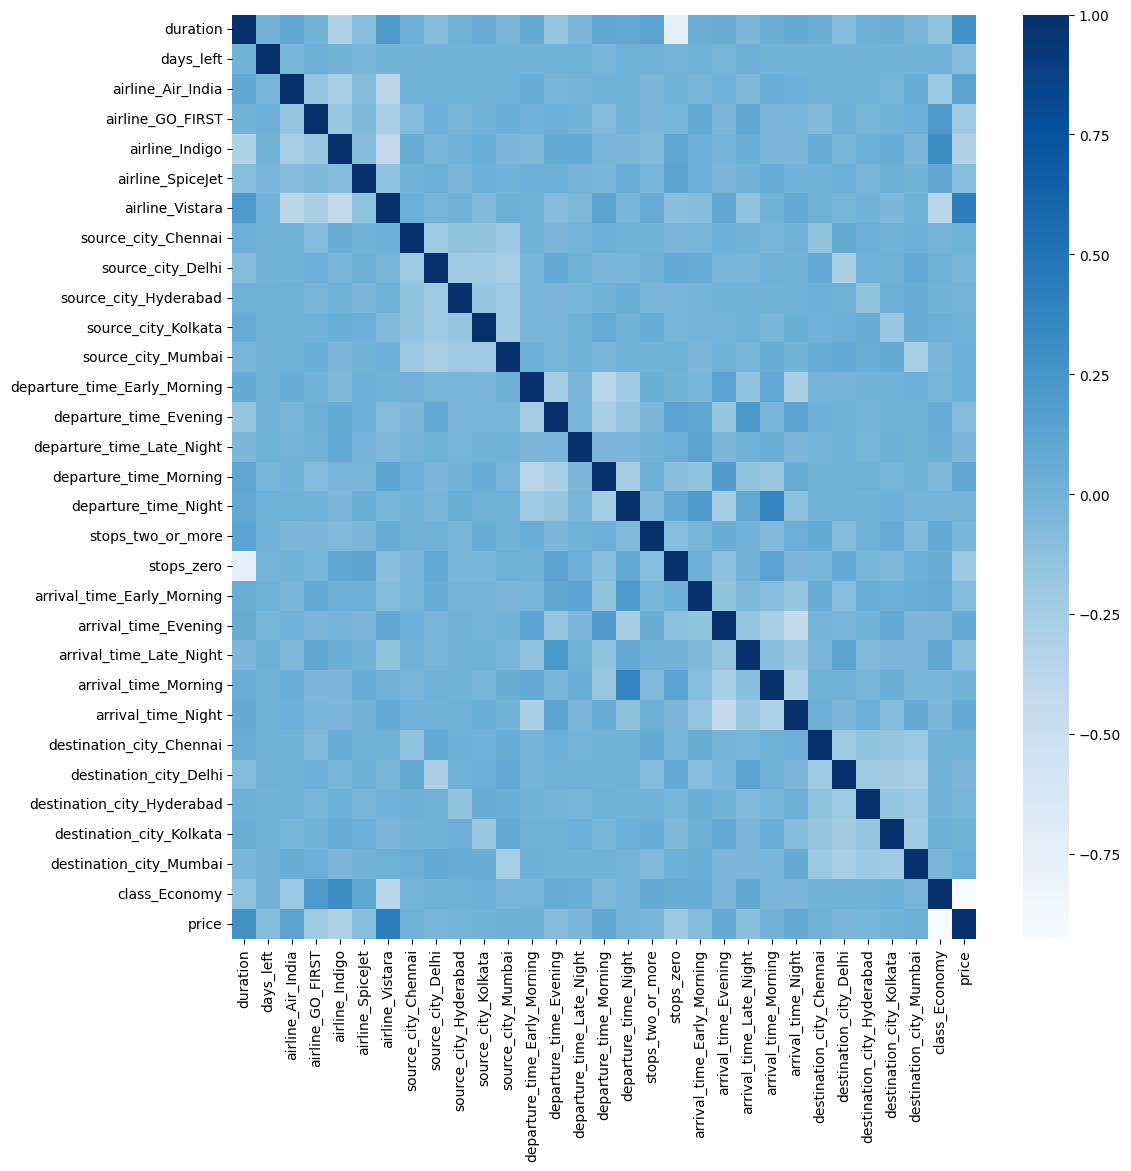

In [86]:
plot_corr_heatmap(data = train_set_clean)

In [87]:
X_train, y_train = split_input_output(data = train_set_clean,
                                      target_column = 'price')

**Standardization**

In [88]:
from sklearn.preprocessing import StandardScaler

def fit_scaler(data):
    """
    Fit the StandardScaler to the data.
    Args:
        data (pd.DataFrame): The input data to be fitted by the scaler.

    Returns:
        scaler (StandardScaler): Fitted StandardScaler object.
    """
    # initialize the StandardScaler
    scaler = StandardScaler()

    # fit the scaler to the data
    scaler.fit(data)

    return scaler

def transform_scaler(data, scaler):
    """
    Transform the data using the fitted StandardScaler.
    Args:
        data (pd.DataFrame): The data to be transformed.
        scaler (StandardScaler): Fitted scaler.

    Returns:
        df_scaled (pd.DataFrame): Scaled data with the same index and columns.
    """
    # Transform the data using the fitted scaler
    df_scaled = pd.DataFrame(scaler.transform(data))

    # Set the index and columns of the scaled DataFrame
    df_scaled.index = data.index
    df_scaled.columns = data.columns

    print(f'Data shape: {data.shape}')

    return df_scaled

In [89]:
# fit scaler using df_rfm_data data
scaler = fit_scaler(data = X_train)

# transform scaler using df_rfm_data data
X_scaled = transform_scaler(data = X_train,
                            scaler = scaler)

X_scaled.head()

Data shape: (157015, 30)


,duration,days_left,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,source_city_Chennai,source_city_Delhi,source_city_Hyderabad,...,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night,destination_city_Chennai,destination_city_Delhi,destination_city_Hyderabad,destination_city_Kolkata,destination_city_Mumbai,class_Economy
0,1.329096,1.542542,-0.475898,2.938770,-0.530579,-0.16493,-0.803418,-0.378186,-0.521837,-0.396466,...,-0.629630,-0.25306,2.343726,-0.707174,-0.373153,-0.528903,2.626355,-0.430356,-0.504275,0.603812
1,-1.559508,-0.102348,-0.475898,-0.340278,-0.530579,-0.16493,1.244682,-0.378186,1.916307,-0.396466,...,-0.629630,-0.25306,-0.426671,-0.707174,-0.373153,-0.528903,-0.380756,-0.430356,1.983043,0.603812
2,-0.182950,1.243471,-0.475898,-0.340278,1.884732,-0.16493,-0.803418,-0.378186,-0.521837,2.522284,...,-0.629630,-0.25306,-0.426671,1.414078,2.679869,-0.528903,-0.380756,-0.430356,-0.504275,0.603812
3,0.990376,-0.326651,-0.475898,-0.340278,-0.530579,-0.16493,1.244682,2.644202,-0.521837,-0.396466,...,-0.629630,-0.25306,2.343726,-0.707174,-0.373153,1.890704,-0.380756,-0.430356,-0.504275,0.603812
4,0.426746,-1.074329,-0.475898,-0.340278,-0.530579,-0.16493,1.244682,-0.378186,-0.521837,-0.396466,...,1.588235,-0.25306,-0.426671,-0.707174,-0.373153,-0.528903,2.626355,-0.430356,-0.504275,0.603812


**Feature Selection**

In [90]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

def feature_selection(estimator, X_train, y_train):
    """
    Fits the given estimator to the training data, computes training and cross-validation
    scores, and extracts the model coefficients.

    Parameters
    ----------
    estimator : sklearn estimator
        The regression model to be fitted (e.g., Lasso).

    X_train : pandas DataFrame
        The training features used to fit the model.

    y_train : pandas Series or numpy array
        The target variable corresponding to the training features.

    Returns
    -------
    estimator : sklearn estimator
        The fitted estimator with learned parameters.

    train_score : float
        The mean squared error of the model on the training data.

    cv_score : float
        The average negative mean squared error obtained from cross-validation.

    estimator_params_df : pandas DataFrame
        A DataFrame containing the model coefficients and the constant term.
    """
    # fit the model
    estimator.fit(X_train, y_train)

    # predict
    y_pred_train = estimator.predict(X_train)
    train_score = mean_squared_error(y_true=y_train, y_pred=y_pred_train)

    # cross validation
    valid_scores = cross_val_score(estimator=estimator,
                                   X=X_train,
                                   y=y_train,
                                   cv=5,
                                   scoring='neg_mean_squared_error')
    cv_score = -np.mean(valid_scores)

    # extract coefficient
    coef_ = estimator.coef_
    intercept_ = estimator.intercept_
    estimator_params = np.append(coef_, intercept_)

    # create DataFrame for coefficients
    estimator_params_df = pd.DataFrame(estimator_params,
                                       index=list(X_train.columns) + ['constant'],
                                       columns=['coefficient'])

    return estimator, train_score, cv_score, estimator_params_df

In [91]:
alpha = np.linspace(0, 10, 100)

# To store results
mse_train_list = []
mse_cv_list = []
model_list = []

# Loop over different alpha values
for i in alpha:
    model_i, train_score_i, \
        cv_score_i, model_param_i = feature_selection(estimator=Lasso(alpha=i),
                                                      X_train=X_scaled,
                                                      y_train=y_train)

    mse_train_list.append(train_score_i)
    mse_cv_list.append(cv_score_i)
    model_list.append(model_param_i)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.653e+12, tolerance: 7.368e+09 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent

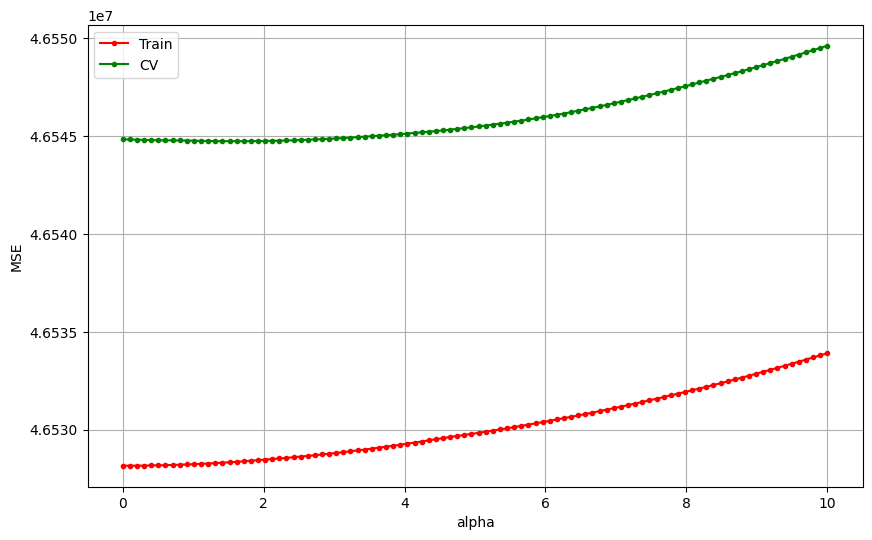

In [92]:
# create subplots
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,6))

# plot error
ax.plot(alpha, mse_train_list, c='r', marker='.', label='Train')
ax.plot(alpha, mse_cv_list, c='g', marker='.', label='CV')
ax.set_xlabel('alpha')
ax.set_ylabel('MSE')

plt.grid()
plt.legend()
plt.show()

In [93]:
# find the index of the minimum cross-validated mse
best_index = np.argmin(mse_cv_list)

# retrieve the best alpha value and corresponding cross-validated mse
best_alpha = alpha[best_index]
best_lasso_cv = mse_cv_list[best_index]

# Output the best alpha value and the corresponding cross-validated mse
best_alpha, best_lasso_cv

(1.6161616161616161, 46544725.18466141)

In [94]:
# best model
best_model_lasso = model_list[best_index]
best_model_lasso

,coefficient
duration,1263.039893
days_left,-1673.613097
airline_Air_India,-228.995311
airline_GO_FIRST,476.815674
airline_Indigo,932.678950
airline_SpiceJet,569.000410
airline_Vistara,1909.212475
source_city_Chennai,-103.191668
source_city_Delhi,-525.780614
source_city_Hyderabad,-495.974926


**Modelling**

Dalam analisis ini, digunakan model regresi Random Forest.

Random Forest, sebagai model ensemble, membantu dalam menangani non-linearitas dan interaksi antar fitur dengan memberikan prediksi yang lebih stabil

**Baseline Model**
* Karena target variable yang dianalisis adalah numerik kontinu, rata-rata digunakan sebagai baseline model
* Dengan membandingkan hasil prediksi model dengan nilai rata-rata dari data, dapat diukur seberapa baik model yang dibangun mampu menjelaskan variasi dalam data dan memberikan prediksi yang lebih akurat daripada sekedar menggunakan rata-rat



In [95]:
# calculate and print the baseline prediction
y_pred_baseline = np.mean(y_train)
print(f'Baseline prediction: {y_pred_baseline:.3f}')

Baseline prediction: 18209.653


In [96]:
from sklearn.metrics import mean_squared_error

def root_mean_square_error(y_true, y_pred):
    """
    Calculate the root mean square error (RMSE) between true and predicted values.

    Parameters
    ----------
    y_true : array-like
        True target values.

    y_pred : array-like
        Predicted values from the model.

    Returns
    -------
    rmse : float
        The root mean square error, representing the standard deviation of the prediction errors.
    """
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return rmse

In [97]:
rmse_baseline_train = root_mean_square_error(y_true = y_train,
                                             y_pred = np.ones(len(y_train)) * y_pred_baseline)

print(f'RMSE Baseline on training set: {rmse_baseline_train}')

RMSE Baseline on training set: 21661.82562550456


**Model Selection**

In [98]:
from sklearn.metrics import r2_score

def fit_model(model, X_train, y_train):
    """
    Fit the given model to the training data, calculate training and cross-validation
    RMSE, and compute the R² score.

    Parameters
    ----------
    model : estimator object
        The machine learning model to be trained.

    X_train : array-like, shape (n_samples, n_features)
        Training data features.

    y_train : array-like, shape (n_samples,)
        Target values for the training data.

    Returns
    -------
    model : estimator object
        The trained model.

    metrics : pandas DataFrame
        DataFrame containing RMSE for training, RMSE for cross-validation,
        and R² score.
    """
    # fitting the model
    model.fit(X_train, y_train)

    # predict the model
    y_pred_train = model.predict(X_train)
    train_rmse = root_mean_square_error(y_true = y_train,
                                         y_pred = y_pred_train)

    # cross validation
    valid_score = cross_val_score(estimator = model,
                                  X = X_train,
                                  y = y_train,
                                  cv = 5,
                                  scoring = 'neg_mean_squared_error')
    cv_rmse = np.sqrt(-np.mean(valid_score))

    # calculate r2 score
    train_r2 = r2_score(y_train, y_pred_train)

    # store metrics
    metrics = pd.DataFrame({
        'Metrics' : ['RMSE Train', 'RMSE CV', 'R2 Score'],
        'Score' : [train_rmse, cv_rmse, train_r2]
    })

    return model, metrics

In [99]:
# fit model with Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

model_rf, metrics_rf = fit_model(model = RandomForestRegressor(n_estimators=50,
                                                               random_state=123),
                                 X_train = X_train,
                                 y_train = y_train)
metrics_rf

,Metrics,Score
0,RMSE Train,1143.170982
1,RMSE CV,2670.193402
2,R2 Score,0.997215


**Hyperparameter Tuning**

In [100]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# define the parameter distribution
param_dist = {
    'n_estimators' : randint(100, 300),
    'max_depth' : [None, 10, 20, 30, 40, 50],
    'min_samples_split' : randint(2, 11),
    'min_samples_leaf' : randint(1, 5),
    'max_features' : [1.0, 'auto', 'sqrt']
}

# initialize the Random Forest Regressor
model_rf = RandomForestRegressor(random_state=123, n_jobs = -1)

# initialize RandomizedSearchCV with the defined parameter distribution
random_search = RandomizedSearchCV(estimator = model_rf,
                                   param_distributions = param_dist,
                                   n_iter = 2,
                                   cv = 3,
                                   scoring = 'neg_mean_squared_error',
                                   verbose = 2,
                                   random_state = 123,
                                   n_jobs = -1)

# fit the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# retrieve the best estimator found during the search
best_regressor = random_search.best_estimator_
best_regressor

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomForestRegressor(max_depth=50, max_features='sqrt', min_samples_leaf=3,
                      min_samples_split=4, n_estimators=117, n_jobs=-1,
                      random_state=123)

**Evaluation**

In [101]:
model_best, metrics_best = fit_model(model = best_regressor,
                                     X_train = X_train,
                                     y_train = y_train)
metrics_best

,Metrics,Score
0,RMSE Train,2117.535766
1,RMSE CV,2712.119203
2,R2 Score,0.990444


**Prepocessing Test Set**

In [102]:
# concatenate the test features and target variable
test_set = pd.concat([X_test, y_test], axis=1)

# remove outliers from the duration column in the test dataset
test_set_clean = remove_outlier(data = test_set,
                                columns = ['duration'])

In [103]:
print(f'Shape data sebelum drop outlier: {test_set.shape}')
print(f'Shape data sebelum drop outlier: {test_set_clean.shape}')

percent_outlier = (1 - (len(test_set_clean) / len(test_set))) * 100
print(f'Persentase data yang dihapus: {round(percent_outlier, 2)}%')

Shape data sebelum drop outlier: (60031, 10)
Shape data sebelum drop outlier: (39580, 10)
Persentase data yang dihapus: 34.07%


In [104]:
# encode categorical column from data test
encoder, test_set_clean = categorical_encoding(data = test_set_clean,
                                               fit = True)

In [105]:
# split input and output data
X_test, y_test = split_input_output(data = test_set_clean,
                                    target_column = 'price')

**Evaluation**

In [106]:
# predict data test with best model
y_pred_test = best_regressor.predict(X_test)
test_rmse = root_mean_square_error(y_true = y_test,
                                   y_pred = y_pred_test)

# calculate r2 score
test_r2 = r2_score(y_test, y_pred_test)

print(f'RMSE Test set: {round(test_rmse, 2)}')
print(f'R2 Score Test set: {round(test_r2, 2) * 100}%')

RMSE Test set: 2668.17
R2 Score Test set: 98.0%


Text(0.5, 1.0, 'Prediction vs Actual Flight Fare')

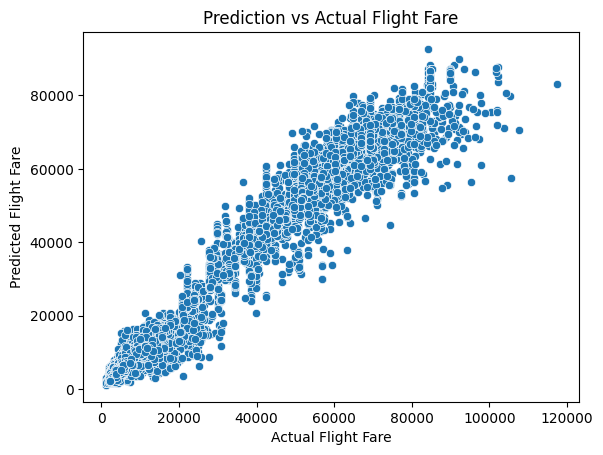

In [107]:
# create a scatter plot to compare actual and predicted flight fares
sns.scatterplot(x = y_test, y = y_pred_test)
plt.xlabel('Actual Flight Fare')
plt.ylabel('Predicted Flight Fare')
plt.title('Prediction vs Actual Flight Fare')

**Interpretation**

Random Forest dikenal sebagai model yang tidak sepenuhnya interpretable. Oleh karena itu, untuk memahami bagaimana model menghasilkan prediksi, perlu diterapkan teknik tambahan seperti feature importance, LIME (Local Interpretable Model-agnostic Explanations), dan PDP (Partial Dependence Plots)

**Feature Importance**

Feature importance adalah teknik yang digunakan untuk menentukan seberapa besar kontribusi masing-masing fitur dalam model terhadap prediksi yang dihasilkan.

Fitur yang memiliki nilai importance tinggi menunjukkan pengaruh yang signifikan terhadap output model, sedangkan fitur dengan nilai importance rendah mungkin tidak memberikan kontribusi berarti.

In [108]:
importances = best_regressor.feature_importances_

for feature, importance in zip(X_train.columns, importances):
    print(f'{feature} : {importance}')

duration : 0.04771858030760264
days_left : 0.017167450006789927
airline_Air_India : 0.012876350412120598
airline_GO_FIRST : 0.012708961290287207
airline_Indigo : 0.031811018747472594
airline_SpiceJet : 0.0011815905495062172
airline_Vistara : 0.06268072780871292
source_city_Chennai : 0.0013034091897367664
source_city_Delhi : 0.0031934714889513983
source_city_Hyderabad : 0.001677293228405894
source_city_Kolkata : 0.0024097609350637065
source_city_Mumbai : 0.001961377314311209
departure_time_Early_Morning : 0.0012184990551449173
departure_time_Evening : 0.0018127398231652186
departure_time_Late_Night : 3.624177144461599e-05
departure_time_Morning : 0.0027674892440920917
departure_time_Night : 0.001063727618279278
stops_two_or_more : 0.003916997944873581
stops_zero : 0.023165696948185235
arrival_time_Early_Morning : 0.0010245819707704075
arrival_time_Evening : 0.0017013718766706752
arrival_time_Late_Night : 0.002040783298642851
arrival_time_Morning : 0.001182583143605967
arrival_time_Night

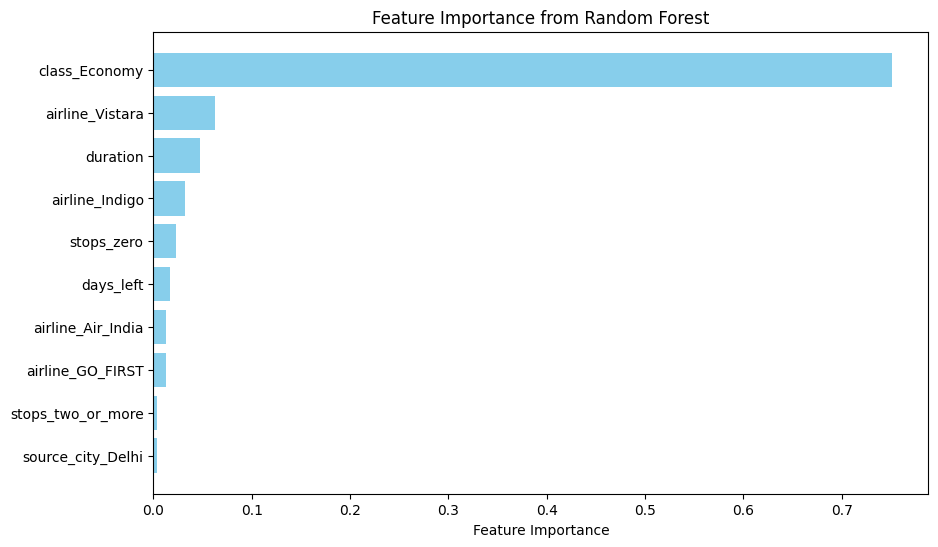

In [109]:
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
top_features = feature_importance_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

**Partial Dependence Plot (PDP)**

Partial Dependence Plot (PDP) adalah sebuah visualisasi yang digunakan untuk memahami pengaruh satu fitur (atau beberapa fitur) terhadap prediksi model machine learning, dengan mengabaikan pengaruh fitur lainnya. Dalam konteks prediksi harga tiket pesawat, PDP plot membantu kita melihat bagaimana perubahan pada satu fitur (misalnya, maskapai penerbangan, kota asal, waktu keberangkatan) memengaruhi harga tiket, dengan asumsi fitur lainnya tetap konstan.

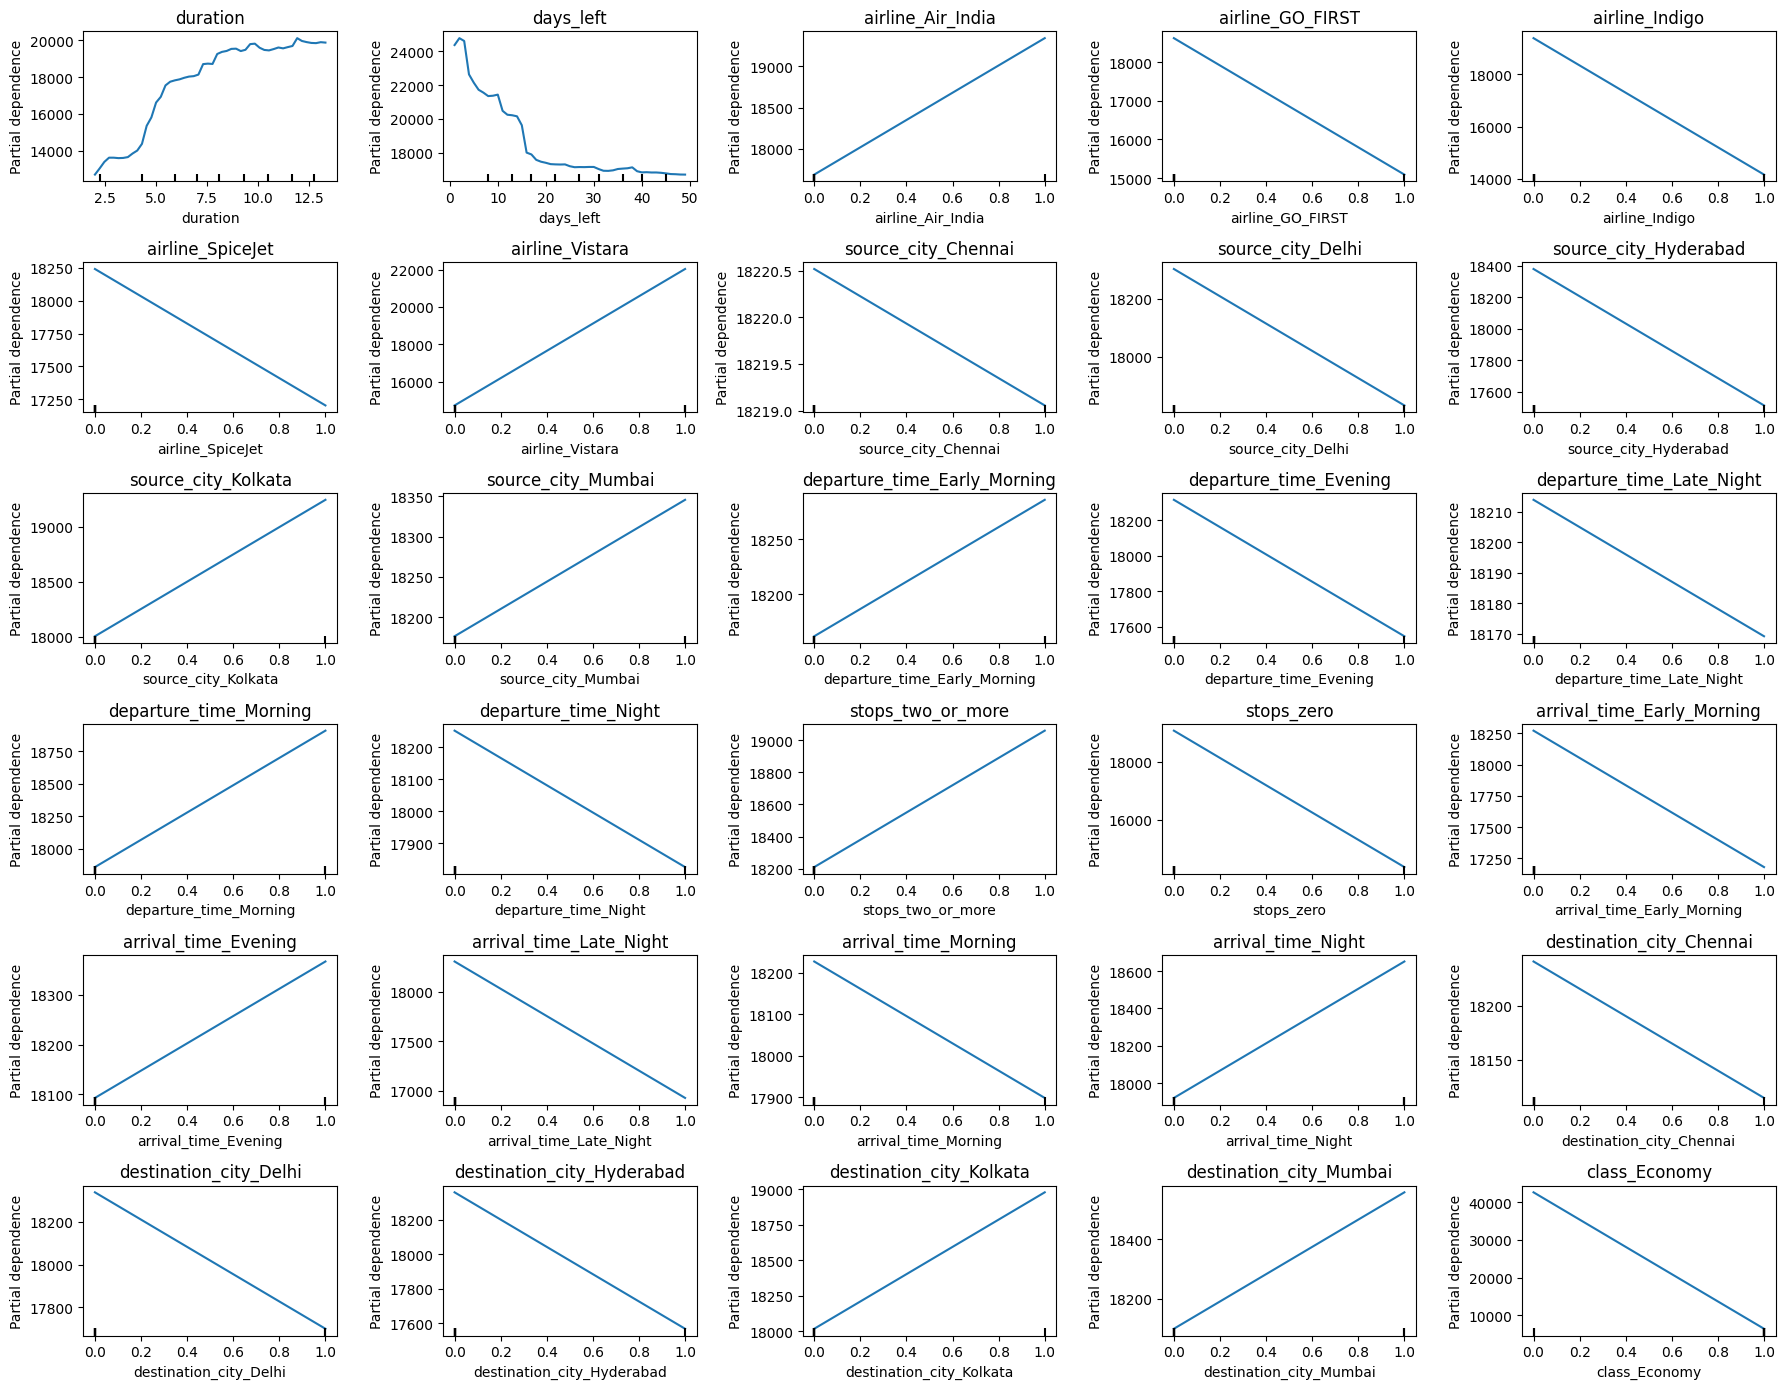

In [110]:
from sklearn.inspection import PartialDependenceDisplay

features = X_train.columns.tolist()
num_features = len(features)
fig, ax = plt.subplots(nrows=6, ncols=5, figsize=(18, 14), squeeze=False)
ax = ax.flatten()

for i, feature in enumerate(features):
    PartialDependenceDisplay.from_estimator(best_regressor,
                                            X_train,
                                            [feature],
                                            ax = ax[i],
                                            grid_resolution=50)
    ax[i].set_title(f'{feature}')

plt.tight_layout()
plt.show()


1. Pengaruh Maskapai
  
  * Maskapai Vistara dan Air India cenderung ada tren kenaikan harga tiket seiring dengan peningkatan nilai pada sumbu x. Ini bisa mengindikasikan bahwa harga tiket maskapai-maskapai ini cenderung lebih tinggi dibandingkan dengan nilai rata-rata.

2. Pengaruh Kota Asal dan Tujuan
  
  * Kota Asal: Kota-kota seperti Mumbai dan Kalkota memiliki pengaruh yang cukup signifikan terhadap harga tiket. Kenaikan nilai pada sumbu x mungkin menunjukkan peningkatan harga tiket untuk rute-rute yang berasal dari kota tersebut.

  * Kota Tujuan: Pola yang serupa terlihat pada plot kota tujuan. Kota-kota seperti Mumbai dan Kalkota memiliki pengaruh yang cukup signifikan terhadap harga tiket.

3. Pengaruh Departure dan Arrival Time

  * Keberangkatan: Penerbangan dengan waktu keberangkatan pagi atau dini hari cenderung memiliki harga yang lebih tinggi. Ini mungkin disebabkan oleh tingginya permintaan pada jam-jam tersebut.

  * Kedatangan: Pola yang serupa terlihat pada plot waktu kedatangan. Penerbangan dengan waktu kedatangan sore atau malam cenderung memiliki harga yang lebih tinggi.

4. Pengaruh Jumlah Transit

  * Penerbangan dengan dua atau lebih transit cenderung memiliki harga yang lebih tinggi dibandingkan dengan penerbangan langsung.

5. Pengaruh Kelas

  * Plot ini menunjukkan bahwa kelas ekonomi memiliki harga yang lebih rendah dibandingkan dengan kelas bisnis.

**LIME**

LIME (Local Interpretable Model-agnostic Explanations) adalah teknik yang digunakan untuk menjelaskan prediksi model dengan cara menghasilkan model lokal yang sederhana di sekitar prediksi yang ingin dijelaskan.

Teknik ini bekerja dengan cara membuat sejumlah sampel baru di sekitar instance yang diuji dan kemudian melatih model yang dapat diinterpretasikan (seperti model linier) pada sampel tersebut. Dengan menggunakan LIME, dapat diidentifikasi fitur-fitur mana yang memiliki kontribusi terbesar terhadap prediksi tertentu, memberikan pemahaman yang lebih dalam tentang bagaimana model mengambil keputusan.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=fb3b8e2002f78ce9da18f3943d84138402003a73dc597b4b9c119ee02502d939
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
{'duration': 2.17, 'days_left': 7.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 0.0, 'airline_SpiceJet': 0.0, 'airline_Vistara': 1.0, 'source_city_Chennai': 0.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 0.0, 'source_city_Mumbai': 1.0, 'departure_time_Early_Morning': 0.0, 'departure_time_Evening': 1.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 1.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 0.0, 'arrival_time_Late_Night': 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


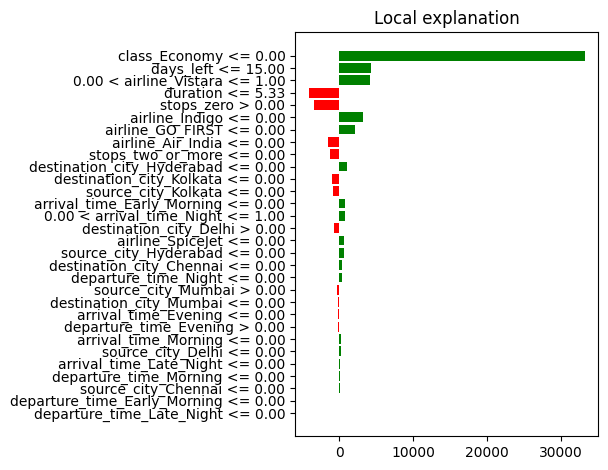

{'duration': 9.42, 'days_left': 8.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 0.0, 'airline_SpiceJet': 1.0, 'airline_Vistara': 0.0, 'source_city_Chennai': 0.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 0.0, 'source_city_Mumbai': 0.0, 'departure_time_Early_Morning': 0.0, 'departure_time_Evening': 0.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 1.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 0.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 1.0, 'arrival_time_Late_Night': 0.0, 'arrival_time_Morning': 0.0, 'arrival_time_Night': 0.0, 'destination_city_Chennai': 0.0, 'destination_city_Delhi': 1.0, 'destination_city_Hyderabad': 0.0, 'destination_city_Kolkata': 0.0, 'destination_city_Mumbai': 0.0, 'class_Economy': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


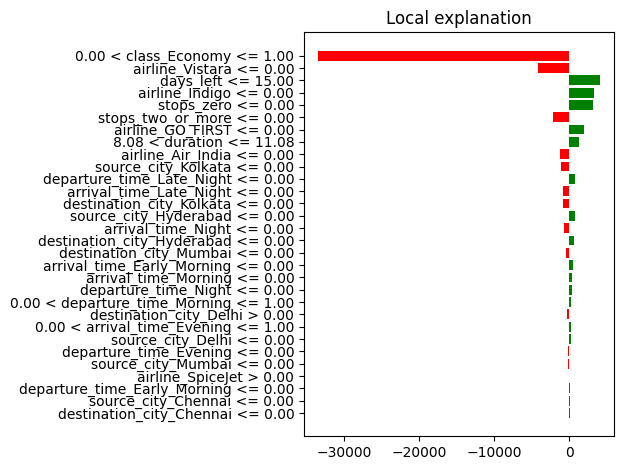

{'duration': 5.5, 'days_left': 23.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 1.0, 'airline_SpiceJet': 0.0, 'airline_Vistara': 0.0, 'source_city_Chennai': 1.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 0.0, 'source_city_Mumbai': 0.0, 'departure_time_Early_Morning': 0.0, 'departure_time_Evening': 0.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 0.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 1.0, 'arrival_time_Late_Night': 0.0, 'arrival_time_Morning': 0.0, 'arrival_time_Night': 0.0, 'destination_city_Chennai': 0.0, 'destination_city_Delhi': 0.0, 'destination_city_Hyderabad': 0.0, 'destination_city_Kolkata': 0.0, 'destination_city_Mumbai': 1.0, 'class_Economy': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


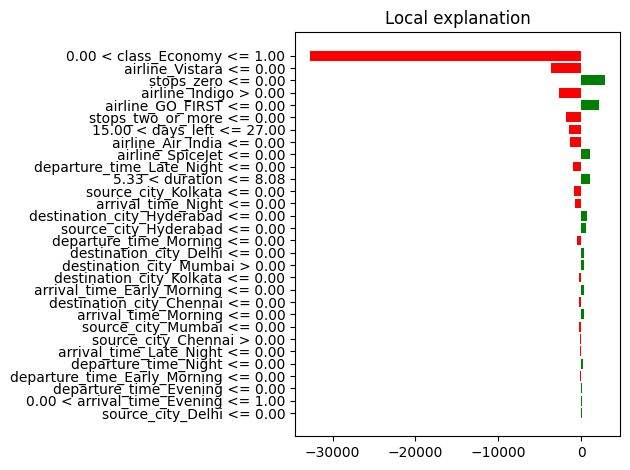

{'duration': 7.5, 'days_left': 32.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 1.0, 'airline_SpiceJet': 0.0, 'airline_Vistara': 0.0, 'source_city_Chennai': 0.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 1.0, 'source_city_Mumbai': 0.0, 'departure_time_Early_Morning': 0.0, 'departure_time_Evening': 1.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 0.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 0.0, 'arrival_time_Late_Night': 1.0, 'arrival_time_Morning': 0.0, 'arrival_time_Night': 0.0, 'destination_city_Chennai': 0.0, 'destination_city_Delhi': 1.0, 'destination_city_Hyderabad': 0.0, 'destination_city_Kolkata': 0.0, 'destination_city_Mumbai': 0.0, 'class_Economy': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


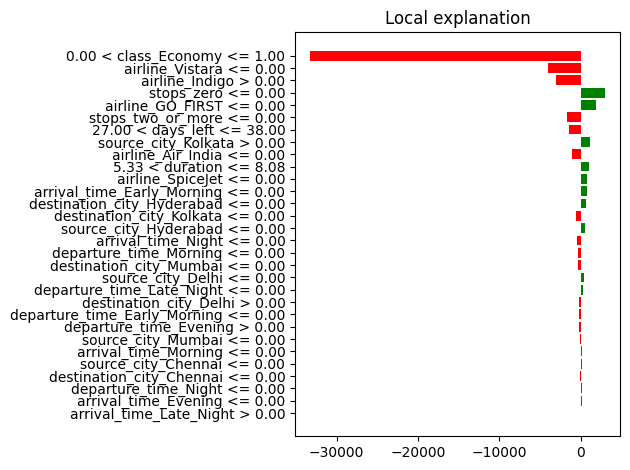

{'duration': 2.67, 'days_left': 12.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 0.0, 'airline_SpiceJet': 0.0, 'airline_Vistara': 1.0, 'source_city_Chennai': 0.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 0.0, 'source_city_Mumbai': 1.0, 'departure_time_Early_Morning': 1.0, 'departure_time_Evening': 0.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 1.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 0.0, 'arrival_time_Late_Night': 0.0, 'arrival_time_Morning': 1.0, 'arrival_time_Night': 0.0, 'destination_city_Chennai': 0.0, 'destination_city_Delhi': 0.0, 'destination_city_Hyderabad': 0.0, 'destination_city_Kolkata': 1.0, 'destination_city_Mumbai': 0.0, 'class_Economy': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


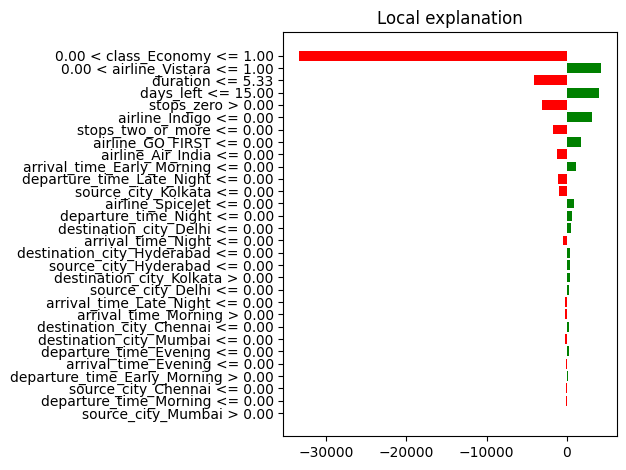

{'duration': 6.83, 'days_left': 47.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 0.0, 'airline_SpiceJet': 1.0, 'airline_Vistara': 0.0, 'source_city_Chennai': 0.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 0.0, 'source_city_Mumbai': 1.0, 'departure_time_Early_Morning': 0.0, 'departure_time_Evening': 0.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 0.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 0.0, 'arrival_time_Late_Night': 0.0, 'arrival_time_Morning': 0.0, 'arrival_time_Night': 1.0, 'destination_city_Chennai': 0.0, 'destination_city_Delhi': 0.0, 'destination_city_Hyderabad': 0.0, 'destination_city_Kolkata': 0.0, 'destination_city_Mumbai': 0.0, 'class_Economy': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


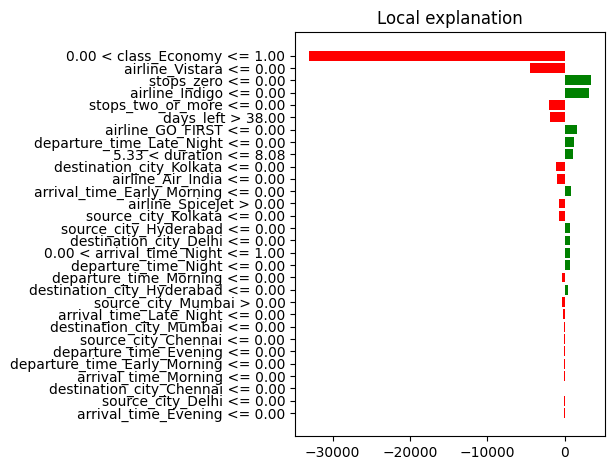

{'duration': 7.58, 'days_left': 31.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 0.0, 'airline_SpiceJet': 0.0, 'airline_Vistara': 1.0, 'source_city_Chennai': 0.0, 'source_city_Delhi': 1.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 0.0, 'source_city_Mumbai': 0.0, 'departure_time_Early_Morning': 0.0, 'departure_time_Evening': 0.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 0.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 0.0, 'arrival_time_Late_Night': 0.0, 'arrival_time_Morning': 0.0, 'arrival_time_Night': 1.0, 'destination_city_Chennai': 1.0, 'destination_city_Delhi': 0.0, 'destination_city_Hyderabad': 0.0, 'destination_city_Kolkata': 0.0, 'destination_city_Mumbai': 0.0, 'class_Economy': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


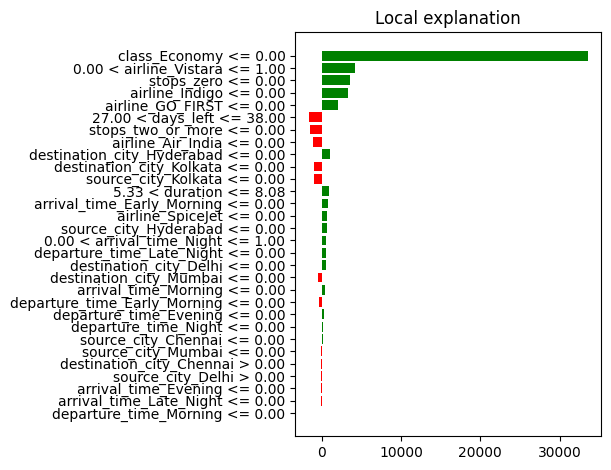

{'duration': 8.08, 'days_left': 21.0, 'airline_Air_India': 1.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 0.0, 'airline_SpiceJet': 0.0, 'airline_Vistara': 0.0, 'source_city_Chennai': 0.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 0.0, 'source_city_Mumbai': 1.0, 'departure_time_Early_Morning': 1.0, 'departure_time_Evening': 0.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 0.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 0.0, 'arrival_time_Late_Night': 0.0, 'arrival_time_Morning': 0.0, 'arrival_time_Night': 0.0, 'destination_city_Chennai': 0.0, 'destination_city_Delhi': 1.0, 'destination_city_Hyderabad': 0.0, 'destination_city_Kolkata': 0.0, 'destination_city_Mumbai': 0.0, 'class_Economy': 0.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


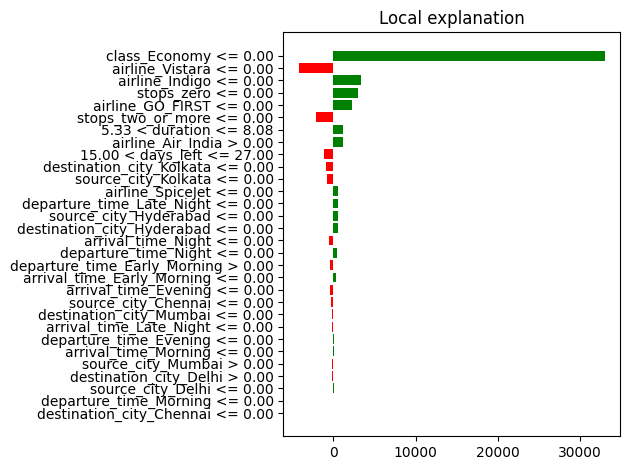

{'duration': 9.0, 'days_left': 38.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 0.0, 'airline_Indigo': 0.0, 'airline_SpiceJet': 0.0, 'airline_Vistara': 1.0, 'source_city_Chennai': 1.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 0.0, 'source_city_Mumbai': 0.0, 'departure_time_Early_Morning': 1.0, 'departure_time_Evening': 0.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 0.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 0.0, 'arrival_time_Late_Night': 0.0, 'arrival_time_Morning': 0.0, 'arrival_time_Night': 0.0, 'destination_city_Chennai': 0.0, 'destination_city_Delhi': 0.0, 'destination_city_Hyderabad': 0.0, 'destination_city_Kolkata': 0.0, 'destination_city_Mumbai': 0.0, 'class_Economy': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


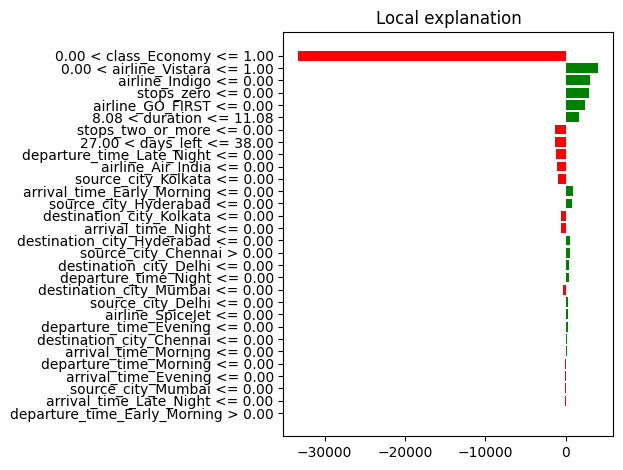

{'duration': 2.17, 'days_left': 40.0, 'airline_Air_India': 0.0, 'airline_GO_FIRST': 1.0, 'airline_Indigo': 0.0, 'airline_SpiceJet': 0.0, 'airline_Vistara': 0.0, 'source_city_Chennai': 0.0, 'source_city_Delhi': 0.0, 'source_city_Hyderabad': 0.0, 'source_city_Kolkata': 1.0, 'source_city_Mumbai': 0.0, 'departure_time_Early_Morning': 0.0, 'departure_time_Evening': 1.0, 'departure_time_Late_Night': 0.0, 'departure_time_Morning': 0.0, 'departure_time_Night': 0.0, 'stops_two_or_more': 0.0, 'stops_zero': 1.0, 'arrival_time_Early_Morning': 0.0, 'arrival_time_Evening': 0.0, 'arrival_time_Late_Night': 0.0, 'arrival_time_Morning': 0.0, 'arrival_time_Night': 1.0, 'destination_city_Chennai': 0.0, 'destination_city_Delhi': 0.0, 'destination_city_Hyderabad': 1.0, 'destination_city_Kolkata': 0.0, 'destination_city_Mumbai': 0.0, 'class_Economy': 1.0}


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


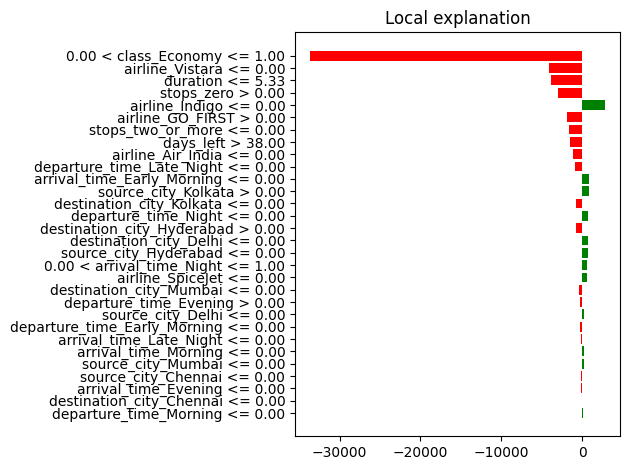

In [112]:
!pip install lime

from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X_train.columns,
    mode = 'regression'
)

feature_contributions = []

for i in range(10):
    print(dict(zip(X_train.columns, X_test.iloc[i])))

    explanation = explainer.explain_instance(
        data_row = X_test.iloc[i].values,
        predict_fn = best_regressor.predict,
        num_features = len(X_train.columns)
    )

    contribution_dict = {feat: contrib for feat, contrib in explanation.as_list()}
    feature_contributions.append(contribution_dict)

    fig = explanation.as_pyplot_figure()
    plt.tight_layout()
    plt.show()

Dari beberapa instance yang dianalisis, berikut adalah penjelasan mengenai pengaruh fitur-fitur pada prediksi model untuk satu instance:

1. Class Economy: Fitur ini menunjukkan pengaruh paling signifikan terhadap prediksi model. Hasil analisis tersebut menunjukkan bahwa pemilihan kelas ekonomi cenderung berhubungan dengan harga tiket yang lebih rendah.

2. Days Left <= 15.00: Jika hari keberangkatan kurang dari atau sama dengan 15 hari, hal ini juga mendorong model untuk menghasilkan prediksi yang mendukung. Model tampaknya memberikan bobot lebih pada perjalanan yang dekat dengan hari keberangkatan.

3. Duration <= 5.33: Fitur ini memberikan pengaruh negatif pada prediksi. Durasi penerbangan yang kurang dari 5.33 jam menurunkan kemungkinan model untuk memberikan hasil prediksi yang positif, mungkin karena perjalanan yang lebih lama dikaitkan dengan harga tiket yang lebih tinggi.

4. Airline Vistara: Maskapai ini memberikan kontribusi positif terhadap prediksi. Model lebih cenderung memprediksi hasil yang lebih besar ketika maskapai Vistara dipilih.

5. Stops Zero: Penerbangan tanpa transit (non-stop) memberikan sedikit pengaruh negatif pada hasil prediksi, meskipun dampaknya lebih kecil dibandingkan fitur lain seperti class Economy atau days left.

Secara keseluruhan, fitur yang paling berpengaruh positif adalah class Economy, Airline Vistara dan days left <= 15.00, sementara duration dan direct flight memberikan pengaruh negatif terhadap prediksi ini.

In [113]:
contributions_df = pd.DataFrame(feature_contributions).fillna(0)
contributions_df

,class_Economy <= 0.00,days_left <= 15.00,0.00 < airline_Vistara <= 1.00,duration <= 5.33,stops_zero > 0.00,airline_Indigo <= 0.00,airline_GO_FIRST <= 0.00,airline_Air_India <= 0.00,stops_two_or_more <= 0.00,destination_city_Hyderabad <= 0.00,...,arrival_time_Late_Night > 0.00,destination_city_Kolkata > 0.00,arrival_time_Morning > 0.00,departure_time_Early_Morning > 0.00,days_left > 38.00,destination_city_Chennai > 0.00,source_city_Delhi > 0.00,airline_Air_India > 0.00,airline_GO_FIRST > 0.00,destination_city_Hyderabad > 0.00
0,33153.215419,4282.512468,4214.573388,-4113.490812,-3363.060020,3178.550196,2146.764783,-1550.452358,-1229.801442,1032.253062,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
1,0.000000,4061.020706,0.000000,0.000000,0.000000,3236.779472,2020.151897,-1192.060609,-2179.708464,694.825302,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2176.688651,-1379.940975,-1859.425764,731.567195,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1838.358809,-1104.490474,-1760.289591,674.984768,...,-48.611304,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
4,0.000000,4034.595168,4292.056827,-4053.792085,-3175.323517,3062.435330,1706.799449,-1250.639629,-1715.477261,387.698195,...,0.000000,339.991361,-227.638486,85.880818,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.000000,0.000000,0.000000,0.000000,0.000000,3192.631602,1649.842250,-1010.461243,-2030.420751,369.794525,...,0.000000,0.000000,0.000000,0.000000,-1838.361714,0.000000,0.000000,0.000000,0.000000,0.00000
6,33502.082348,0.000000,4188.201884,0.000000,0.000000,3293.266348,2036.972261,-1131.838069,-1483.946403,1017.184686,...,0.000000,0.000000,0.000000,0.000000,0.000000,-71.108989,-50.740999,0.000000,0.000000,0.00000
7,32997.481006,0.000000,0.000000,0.000000,0.000000,3328.376148,2317.101328,0.000000,-2111.381896,525.108335,...,0.000000,0.000000,0.000000,-382.016694,0.000000,0.000000,0.000000,1202.356166,0.000000,0.00000
8,0.000000,0.000000,4028.255344,0.000000,0.000000,3012.859113,2381.381232,-1113.920306,-1383.467301,540.776435,...,0.000000,0.000000,0.000000,42.805814,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
9,0.000000,0.000000,0.000000,-3806.151288,-3015.508014,2838.309905,0.000000,-1133.666388,-1643.154756,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1532.578909,0.000000,0.000000,0.000000,-1886.620465,-720.23588


In [114]:
avg_contributions = contributions_df.mean()
avg_contrib_sort = avg_contributions.sort_values(ascending=False)
avg_contrib_sort

,0
class_Economy <= 0.00,9965.277877
airline_Indigo <= 0.00,2514.320811
stops_zero <= 0.00,2183.118172
airline_GO_FIRST <= 0.00,1827.406066
0.00 < airline_Vistara <= 1.00,1672.308744
days_left <= 15.00,1237.812834
arrival_time_Early_Morning <= 0.00,697.205881
source_city_Hyderabad <= 0.00,621.804049
destination_city_Hyderabad <= 0.00,597.419251
airline_SpiceJet <= 0.00,555.776638


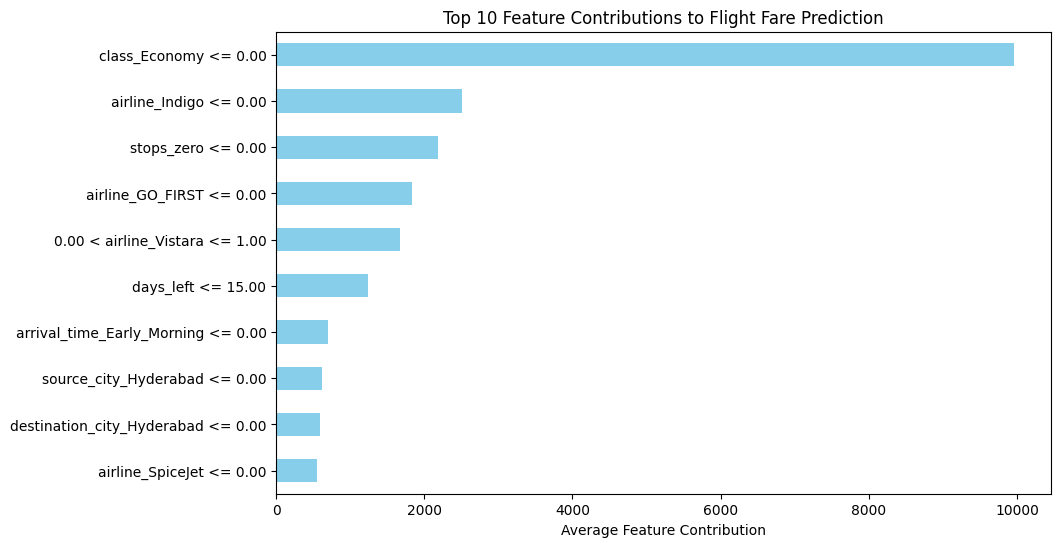

In [115]:
top_10_contrib = avg_contrib_sort.head(10)

plt.figure(figsize=(10, 6))
top_10_contrib.plot(kind='barh', color='skyblue')
plt.xlabel('Average Feature Contribution')
plt.title('Top 10 Feature Contributions to Flight Fare Prediction')
plt.gca().invert_yaxis()
plt.show()

**Revenue by Days Left**

In [116]:
X_test_simulation = X_test.copy()

days_left_scenarios = range(1, 30)
revenue_days_left = []

for days in days_left_scenarios:
    X_test_simulation['days_left'] = days
    predicted_prices = best_regressor.predict(X_test_simulation)
    total_revenue = np.sum(predicted_prices)
    revenue_days_left.append((days, total_revenue))

revenue_df = pd.DataFrame(revenue_days_left, columns=['Days Left', 'Revenue'])
revenue_df.head(10)

,Days Left,Revenue
0,1,9.596440e+08
1,2,9.702780e+08
2,3,9.646399e+08
3,4,8.879029e+08
4,5,8.690761e+08
5,6,8.529205e+08
6,7,8.459643e+08
7,8,8.376605e+08
8,9,8.383022e+08
9,10,8.409847e+08


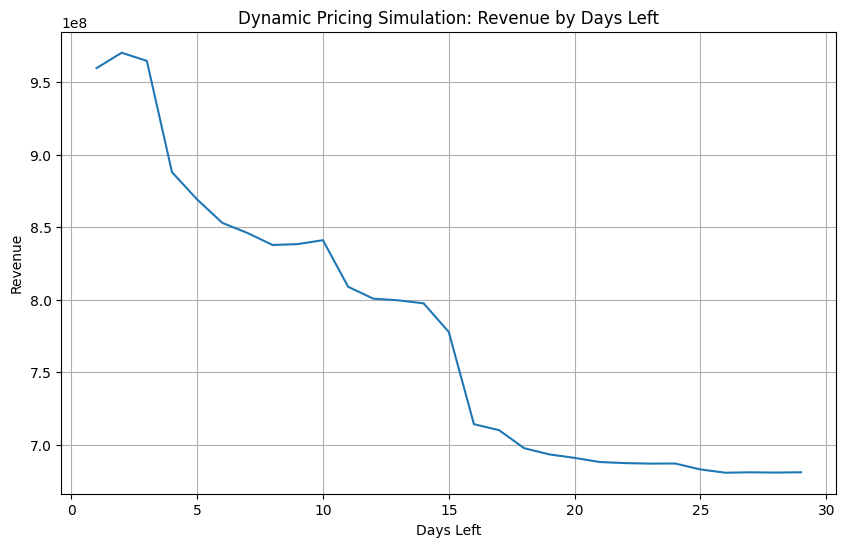

In [117]:
plt.figure(figsize=(10,6))
plt.plot(revenue_df['Days Left'], revenue_df['Revenue'])
plt.xlabel('Days Left')
plt.ylabel('Revenue')
plt.title('Dynamic Pricing Simulation: Revenue by Days Left')
plt.grid(True)
plt.show()

**Pola Revenue**

1. Selama 15 hari sebelum tanggal penerbangan, perusahaan mulai melihat peningkatan yang signifikan dalam revenue. Hal ini menunjukkan bahwa konsumen cenderung melakukan pemesanan lebih banyak menjelang waktu keberangkatan.

2. Temuan ini menyiratkan bahwa perusahaan dapat mempertimbangkan untuk mengadopsi strategi pemasaran yang lebih agresif dan promosi pada periode 15 hari menjelang keberangkatan. Ini bisa termasuk penawaran khusus atau diskon untuk mendorong konsumen memesan lebih awal.